In [153]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# **Generate a population of random numbers**

In [154]:
# Create 230,000 random numbers in a 1/f distribution


randint = np.logspace(np.log10(0.001),np.log10(100),230000)

fdist = np.zeros(230000)

for i in range(len(randint)):
  fdist[i] = 1/randint[i]
  if fdist[i]< 0:
    print(fdist[i])

fdist[:40]

array([1000.        ,  999.94994484,  999.89989218,  999.84984203,
        999.79979438,  999.74974924,  999.69970661,  999.64966647,
        999.59962885,  999.54959373,  999.49956111,  999.449531  ,
        999.39950339,  999.34947828,  999.29945568,  999.24943558,
        999.19941799,  999.1494029 ,  999.09939032,  999.04938023,
        998.99937266,  998.94936758,  998.89936501,  998.84936494,
        998.79936737,  998.7493723 ,  998.69937974,  998.64938968,
        998.59940213,  998.54941707,  998.49943452,  998.44945447,
        998.39947692,  998.34950187,  998.29952932,  998.24955928,
        998.19959173,  998.14962669,  998.09966415,  998.04970411])

In [155]:
# Only take every 1000th entry in fdist
fdist1000 = fdist[0::1000]

fdist1000[:40]

array([1000.        ,  951.17576211,  904.73533043,  860.56231743,
        818.54601812,  778.58113261,  740.56750218,  704.40985828,
        670.01758379,  637.30448589,  606.18858006,  576.59188462,
        548.44022528,  521.66304926,  496.19324844,  471.96699124,
        448.92356258,  427.00521177,  406.15700773,  386.32670137,
        367.4645946 ,  349.52341581,  332.45820141,  316.2261831 ,
        300.78668071,  286.10100026,  272.13233696,  258.845683  ,
        246.2077398 ,  234.18683454,  222.75284082,  211.87710313,
        201.53236504,  191.69270091,  182.33345088,  173.4311591 ,
        164.96351493,  156.90929703,  149.24832019,  141.9613847 ])

In [156]:
#Sort the array in descending order
fdist1000[::-1].sort()
fdist1000[1]

951.1757621112006

In [157]:
#Create index
index = np.zeros(len(fdist1000))

for i in range(len(fdist1000)):
  index[i] = i+1

index[:40]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40.])

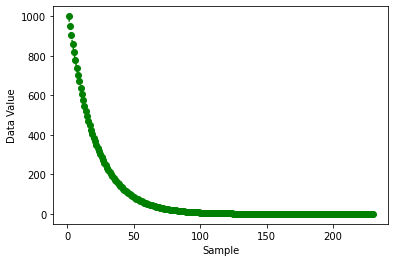

In [158]:
# Graphing the random numbers 

plt.plot(index,fdist1000, 'go--')
plt.xlabel('Sample')
plt.ylabel('Data Value')
plt.show()

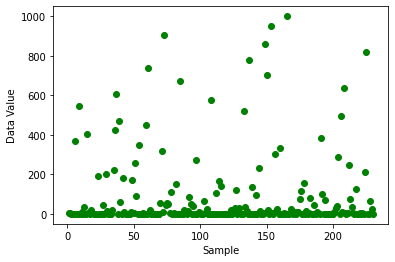

In [159]:
# Shuffle fdist1000

shuffledist = fdist1000.copy()

np.random.shuffle(shuffledist)

plt.plot(index,shuffledist, 'go')
plt.xlabel('Sample')
plt.ylabel('Data Value')
plt.show()

# **Monte Carlo sampling**

In [160]:
### Randomly select 50 of the 230000 data points. Find the mean. Repeat this 500 times. ###
### Basically do 500 iterations of 50 random points and find the average of each batch of 50. ###

mean = np.zeros(500)

for i in range(len(mean)):
  fifty  =  np.random.choice(fdist, size=50, replace=False)
  mean[i] = np.mean(fifty) 

mean[:100]


array([ 67.98615175, 102.13576835,  82.02364419,  84.61018541,
        76.97495128,  98.02358465, 101.35134696,  90.18122637,
       112.56487335, 131.0408085 ,  80.5281592 ,  51.92483619,
        52.32871296,  90.42711967,  80.30171327,  72.77608872,
        74.33783128,  86.41819578,  79.87691501, 150.11087798,
       100.58068111,  67.4115929 ,  67.51035677,  94.9751637 ,
        75.81307397,  62.71026847, 128.42059384,  54.91634699,
        48.76401188, 148.81596306,  96.46867094,  51.80815828,
        52.85234769,  85.28826867,  92.1827875 ,  25.74951461,
       111.08175435, 102.62169403,  57.63775877, 105.33243057,
       109.78102376, 108.34206783,  74.70598939, 162.08843442,
       101.15028576,  86.51021921,  85.85916168,  99.2537638 ,
       100.08320555, 101.07504602,  70.23180519,  66.03913777,
        97.90259773,  68.02442645,  44.78942232, 134.15474704,
       117.42070833,  92.44970087,  58.95719196, 106.12503137,
        50.25021338,  73.65811179, 100.41587604,  95.04

In [161]:
# Calculate real average 

realmean = sum(fdist)/len(fdist)

print(realmean)

86.85982410100492


In [162]:
# Create index for mean to plot
meanindex = np.zeros(len(mean))

for i in range(len(mean)):
  meanindex[i] = i+1

meanindex[:40]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40.])

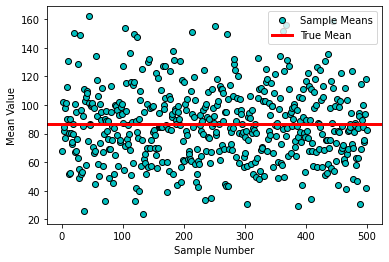

In [163]:
# Plot Monte-Carlo sampling 

plt.plot(meanindex,mean, 'ko',markerfacecolor='c' , label = 'Sample Means')
plt.axhline(y=realmean, color='r', linewidth='3', linestyle='-', label = 'True Mean')
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

# **Cumulative averaging**

In [182]:
# Cumulative average of all sample means

cumemean = np.zeros(500)
cumesum = np.zeros(500)
length = len(mean)

for i in range(length):
  cumesum[i] = np.sum(mean[:i+1])
  #if i == 0:
    #cumemean[i] = cumesum[i]/(i+1)
  #else:
  cumemean[i] = cumesum[i] / (i+1)



In [183]:
# Create index for cumulative mean to plot
cumemeanindex = np.zeros(len(cumemean))

for i in range(len(cumemean)):
  cumemeanindex[i] = i+1

cumemeanindex[-1]

500.0

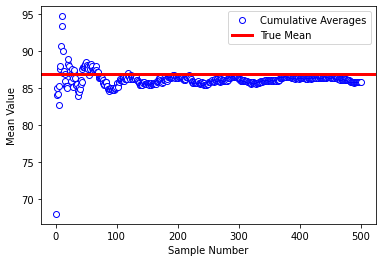

In [184]:
# Plot of Cumulative Average

plt.plot(cumemeanindex,cumemean, 'bo',markerfacecolor='w' , label = 'Cumulative Averages')
plt.axhline(y=realmean, color='r', linewidth='3', linestyle='-', label = 'True Mean')
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

In [277]:
### Compute the square divergence for each point. Repeat 100 times ###

dfdivergence = pd.DataFrame(cumemean, columns = ['Original Cumulative Mean Run 1'])


In [278]:
# Find the divergence from mean (realmean) for the first run

divergence1 = (dfdivergence["Original Cumulative Mean Run 1"] - realmean)**2

In [279]:
divergence1[:20]

0     356.215508
1       3.235912
2       7.903423
3       7.133636
4      16.922395
5       2.456878
6       0.528085
7       1.104671
8      14.366892
9      61.299974
10     42.798519
11      9.521157
12      0.036880
13      0.187602
14      0.001086
15      0.830150
16      2.541213
17      2.341178
18      3.301785
19      2.063031
Name: Original Cumulative Mean Run 1, dtype: float64

In [280]:
dfdivergence['Divergence 1'] = divergence1

In [281]:
dfdivergence


,Original Cumulative Mean Run 1,Divergence 1
0,67.986152,356.215508
1,85.060960,3.235912
2,84.048521,7.903423
3,84.188937,7.133636
4,82.746140,16.922395
...,...,...
495,85.753484,1.223988
496,85.770034,1.187643
497,85.834876,1.050519
498,85.746245,1.240058


In [172]:
dfmeans = pd.DataFrame()

for i in range(99):
  dfmeans[i] = np.zeros(500)



In [173]:
for i in range(99):
  for j in range(500):
    dffifty  =  np.random.choice(fdist, size=50, replace=False)
    tempmean = np.mean(dffifty) 
    dfmeans.at[j, i] =  tempmean


In [244]:
dfmeans[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,74.937889,74.276938,100.284610,75.789487,59.655015,82.107161,88.498973,88.113387,69.396404,65.489599,94.019303,74.162844,89.934541,64.972033,59.365024,142.887310,82.266480,112.058254,132.756367,58.315011,71.058114,118.700971,90.777003,81.025710,94.667455,82.333035,85.635380,119.127696,91.245023,54.459253,126.994181,39.858513,68.616000,80.112527,57.412848,91.080166,95.430660,71.313670,76.793345,67.734063,...,80.934385,109.689218,54.424231,70.118103,66.866877,76.986242,110.104886,66.473258,75.322916,60.635880,118.877211,67.911087,75.290520,58.027565,77.202742,79.734313,49.646783,68.374652,81.572564,99.748712,122.272322,104.625286,127.976774,98.981359,85.735440,74.197299,92.707027,76.515808,76.086048,121.381392,132.838198,72.214108,70.799495,110.049035,66.761855,89.674942,115.634975,31.945600,60.965551,78.211359
1,138.043601,81.689763,72.822435,85.299321,65.626406,113.176729,58.858500,95.434604,81.455273,106.687790,81.915903,56.154894,80.641054,156.097419,98.289349,64.529031,88.664231,78.517910,63.277598,66.774089,105.823766,71.547393,101.363350,81.766167,98.180118,82.701968,131.656788,66.937905,89.029918,72.363633,98.865857,91.789957,121.041201,64.212401,94.137915,71.552959,98.364582,82.453629,119.333271,84.046282,...,46.562529,56.998312,77.076246,78.289210,70.955538,111.877475,115.913744,128.668350,76.975811,124.930046,57.953052,41.317939,68.260108,109.190151,35.486902,92.807551,69.437964,67.187105,66.310200,52.194465,93.068485,132.704129,93.146028,95.819482,89.721091,103.294585,70.812333,63.683191,84.266123,88.328892,47.066667,122.821117,143.268615,27.154618,60.580440,67.283963,72.469403,93.992967,114.503597,98.098198
2,87.972088,74.313232,45.930195,151.876994,31.054816,114.044333,137.398622,107.903746,77.170636,72.382890,62.810409,130.069957,94.413725,57.284416,145.006002,103.107534,56.073558,53.878385,99.936901,139.126565,130.712847,74.351367,138.208762,55.459425,58.412382,63.813441,114.440220,94.770428,109.391353,102.333282,95.055024,35.315748,89.834427,90.809781,72.665757,45.517238,108.513131,83.422406,75.130160,152.476430,...,112.762712,107.449844,108.364116,84.482847,92.967940,131.470747,69.675681,84.349632,48.760865,112.782554,118.274919,91.219288,85.719904,154.939885,159.888758,70.440115,57.360959,61.780849,47.918017,109.102082,110.130518,69.102006,86.678238,80.975706,57.679673,81.073802,92.891381,81.458477,91.734206,114.851795,133.621359,77.042558,109.201098,103.962147,120.478269,61.168796,119.550875,124.963025,107.881076,99.736831
3,90.947120,69.666313,55.798918,84.489520,64.355957,84.735975,104.218300,89.623128,86.596866,100.164373,66.780895,58.445544,98.886402,120.388366,66.197107,110.097112,81.276186,183.841625,63.106537,80.042853,102.009173,100.304211,24.039065,108.668954,115.836047,140.684490,85.618258,54.864131,112.109182,110.848083,118.529675,59.137885,61.187453,76.104645,117.331767,84.328621,92.185074,89.936409,73.255995,76.302782,...,55.610050,63.914651,69.946513,65.231792,98.860629,77.976718,88.015120,75.960913,67.742596,92.393317,77.271713,84.493541,70.484882,67.963078,86.513001,39.021169,71.953656,61.221831,81.986567,105.729836,112.709982,48.304361,112.929462,47.523918,60.848525,94.197710,91.375983,94.192803,100.486766,141.367819,94.412199,62.540797,69.554993,105.921292,79.657147,116.191198,77.037542,106.527217,66.546227,62.825627
4,73.438779,52.913571,94.742418,135.251038,78.375796,61.889190,80.356782,55.384780,97.227185,134.624610,47.797101,79.314964,127.341281,95.443697,78.248708,78.062431,76.873955,96.820869,110.498188,87.347888,124.985699,86.007420,75.581355,92.737644,133.275056,88.987689,76.757494,93.466440,100.043869,64.477592,105.971298,68.927257,123.620924,149.334914,61.945647,119.083332,75.721403,100.691695,64.561844,115.894914,...,81.690159,133.083671,105.399218

In [237]:
dfcumemean = pd.DataFrame()
dfcumesum = pd.DataFrame()


dfcumesum = dfmeans.cumsum(axis=0) # Finding the cumulative sum down each column





In [238]:
dfcumesum

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,74.937889,74.276938,100.284610,75.789487,59.655015,82.107161,88.498973,88.113387,69.396404,65.489599,94.019303,74.162844,89.934541,64.972033,59.365024,142.887310,82.266480,112.058254,132.756367,58.315011,71.058114,118.700971,90.777003,81.025710,94.667455,82.333035,85.635380,119.127696,91.245023,54.459253,126.994181,39.858513,68.616000,80.112527,57.412848,91.080166,95.430660,71.313670,76.793345,67.734063,...,80.934385,109.689218,54.424231,70.118103,66.866877,76.986242,110.104886,66.473258,75.322916,60.635880,118.877211,67.911087,75.290520,58.027565,77.202742,79.734313,49.646783,68.374652,81.572564,99.748712,122.272322,104.625286,127.976774,98.981359,85.735440,74.197299,92.707027,76.515808,76.086048,121.381392,132.838198,72.214108,70.799495,110.049035,66.761855,89.674942,115.634975,31.945600,60.965551,78.211359
1,212.981490,155.966702,173.107045,161.088808,125.281421,195.283890,147.357473,183.547992,150.851677,172.177389,175.935206,130.317738,170.575595,221.069452,157.654373,207.416342,170.930711,190.576163,196.033966,125.089101,176.881880,190.248364,192.140352,162.791877,192.847573,165.035003,217.292168,186.065602,180.274940,126.822885,225.860038,131.648469,189.657201,144.324928,151.550763,162.633124,193.795243,153.767299,196.126616,151.780346,...,127.496914,166.687529,131.500477,148.407313,137.822416,188.863717,226.018630,195.141609,152.298727,185.565926,176.830263,109.229026,143.550628,167.217716,112.689644,172.541864,119.084747,135.561757,147.882763,151.943178,215.340808,237.329415,221.122803,194.800842,175.456531,177.491884,163.519360,140.198999,160.352170,209.710284,179.904865,195.035225,214.068111,137.203652,127.342295,156.958905,188.104378,125.938567,175.469148,176.309557
2,300.953578,230.279934,219.037239,312.965802,156.336237,309.328222,284.756095,291.451738,228.022312,244.560279,238.745615,260.387695,264.989319,278.353868,302.660375,310.523876,227.004269,244.454548,295.970866,264.215666,307.594726,264.599731,330.349114,218.251302,251.259955,228.848444,331.732389,280.836030,289.666293,229.156167,320.915063,166.964218,279.491628,235.134708,224.216520,208.150363,302.308374,237.189706,271.256776,304.256776,...,240.259626,274.137373,239.864594,232.890159,230.790355,320.334464,295.694311,279.491241,201.059593,298.348480,295.105182,200.448314,229.270532,322.157601,272.578402,242.981979,176.445706,197.342606,195.800780,261.045260,325.471326,306.431421,307.801040,275.776548,233.136204,258.565686,256.410741,221.657476,252.086377,324.562078,313.526223,272.077783,323.269209,241.165799,247.820564,218.127701,307.655252,250.901592,283.350223,276.046389
3,391.900698,299.946246,274.836158,397.455321,220.692194,394.064198,388.974395,381.074866,314.619178,344.724652,305.526511,318.833240,363.875722,398.742235,368.857482,420.620988,308.280455,428.296173,359.077403,344.258519,409.603900,364.903943,354.388180,326.920255,367.096002,369.532934,417.350647,335.700161,401.775475,340.004250,439.444737,226.102103,340.679081,311.239354,341.548287,292.478984,394.493448,327.126115,344.512771,380.559558,...,295.869675,338.052024,309.811106,298.121951,329.650985,398.311182,383.709432,355.452154,268.802188,390.741797,372.376895,284.941856,299.755413,390.120679,359.091403,282.003148,248.399362,258.564437,277.787347,366.775096,438.181308,354.735782,420.730503,323.300466,293.984729,352.763395,347.786724,315.850279,352.573143,465.929897,407.938422,334.618580,392.824201,347.087091,327.477711,334.318899,384.692795,357.428809,349.896451,338.872016
4,465.339477,352.859818,369.578576,532.706359,299.067990,455.953387,469.331177,436.459645,411.846363,479.349262,353.323611,398.148204,491.217003,494.185931,447.106190,498.683419,385.154409,525.117042,469.575591,431.606407,534.589599,450.911362,429.969535,419.657899,500.371058,458.520

In [242]:
for i in range(99):
  for j in range(500):
    dfcumemean.at[j,i] = dfcumesum.at[j,i]/(j+1) # Finding the cumulative mean down each column


In [243]:
dfcumemean

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,74.937889,74.276938,100.284610,75.789487,59.655015,82.107161,88.498973,88.113387,69.396404,65.489599,94.019303,74.162844,89.934541,64.972033,59.365024,142.887310,82.266480,112.058254,132.756367,58.315011,71.058114,118.700971,90.777003,81.025710,94.667455,82.333035,85.635380,119.127696,91.245023,54.459253,126.994181,39.858513,68.616000,80.112527,57.412848,91.080166,95.430660,71.313670,76.793345,67.734063,...,80.934385,109.689218,54.424231,70.118103,66.866877,76.986242,110.104886,66.473258,75.322916,60.635880,118.877211,67.911087,75.290520,58.027565,77.202742,79.734313,49.646783,68.374652,81.572564,99.748712,122.272322,104.625286,127.976774,98.981359,85.735440,74.197299,92.707027,76.515808,76.086048,121.381392,132.838198,72.214108,70.799495,110.049035,66.761855,89.674942,115.634975,31.945600,60.965551,78.211359
1,106.490745,77.983351,86.553522,80.544404,62.640710,97.641945,73.678736,91.773996,75.425838,86.088694,87.967603,65.158869,85.287797,110.534726,78.827186,103.708171,85.465356,95.288082,98.016983,62.544550,88.440940,95.124182,96.070176,81.395938,96.423787,82.517501,108.646084,93.032801,90.137470,63.411443,112.930019,65.824235,94.828600,72.162464,75.775381,81.316562,96.897621,76.883650,98.063308,75.890173,...,63.748457,83.343765,65.750239,74.203656,68.911208,94.431859,113.009315,97.570804,76.149364,92.782963,88.415131,54.614513,71.775314,83.608858,56.344822,86.270932,59.542374,67.780878,73.941382,75.971589,107.670404,118.664708,110.561401,97.400421,87.728265,88.745942,81.759680,70.099500,80.176085,104.855142,89.952432,97.517613,107.034055,68.601826,63.671148,78.479452,94.052189,62.969284,87.734574,88.154779
2,100.317859,76.759978,73.012413,104.321934,52.112079,103.109407,94.918698,97.150579,76.007437,81.520093,79.581872,86.795898,88.329773,92.784623,100.886792,103.507959,75.668090,81.484849,98.656955,88.071889,102.531575,88.199910,110.116371,72.750434,83.753318,76.282815,110.577463,93.612010,96.555431,76.385389,106.971688,55.654739,93.163876,78.378236,74.738840,69.383454,100.769458,79.063235,90.418925,101.418925,...,80.086542,91.379124,79.954865,77.630053,76.930118,106.778155,98.564770,93.163747,67.019864,99.449493,98.368394,66.816105,76.423511,107.385867,90.859467,80.993993,58.815235,65.780869,65.266927,87.015087,108.490442,102.143807,102.600347,91.925516,77.712068,86.188562,85.470247,73.885825,84.028792,108.187359,104.508741,90.692594,107.756403,80.388600,82.606855,72.709234,102.551751,83.633864,94.450074,92.015463
3,97.975175,74.986562,68.709039,99.363830,55.173048,98.516049,97.243599,95.268716,78.654795,86.181163,76.381628,79.708310,90.968930,99.685559,92.214371,105.155247,77.070114,107.074043,89.769351,86.064630,102.400975,91.225986,88.597045,81.730064,91.774001,92.383233,104.337662,83.925040,100.443869,85.001063,109.861184,56.525526,85.169770,77.809838,85.387072,73.119746,98.623362,81.781529,86.128193,95.139889,...,73.967419,84.513006,77.452777,74.530488,82.412746,99.577796,95.927358,88.863038,67.200547,97.685449,93.094224,71.235464,74.938853,97.530170,89.772851,70.500787,62.099841,64.641109,69.446837,91.693774,109.545327,88.683945,105.182626,80.825116,73.496182,88.190849,86.946681,78.962570,88.143286,116.482474,101.984606,83.654645,98.206050,86.771773,81.869428,83.579725,96.173199,89.357202,87.474113,84.718004
4,93.067895,70.571964,73.915715,106.541272,59.813598,91.190677,93.866235,87.291929,82.369273,95.869852,70.664722,79.629641,98.243401,98.837186,89.421238,99.736684,77.030882,105.023408,93.915118,86.321281,106.917920,90.182272,85.993907,83.931580,100.074212,91.704125,98.821628,85.833320,100.363869,80.896368,109.083207,59.005872,92.860001,92.114853,80.698787,82.312463,94.042970,85.563562,81.814923,99.290894,...,75.511967,94.227139,83.042065,79.365861,77.386570,102.920624,90.062002,

In [282]:
for i in range(99):
  dfdivergence['Divergence' + ' ' + str(i+2)] = (dfcumemean[i] - realmean)**2

In [286]:
dfdivergence[:4]

,Original Cumulative Mean Run 1,Divergence 1,Divergence 2,Divergence 3,Divergence 4,Divergence 5,Divergence 6,Divergence 7,Divergence 8,Divergence 9,Divergence 10,Divergence 11,Divergence 12,Divergence 13,Divergence 14,Divergence 15,Divergence 16,Divergence 17,Divergence 18,Divergence 19,Divergence 20,Divergence 21,Divergence 22,Divergence 23,Divergence 24,Divergence 25,Divergence 26,Divergence 27,Divergence 28,Divergence 29,Divergence 30,Divergence 31,Divergence 32,Divergence 33,Divergence 34,Divergence 35,Divergence 36,Divergence 37,Divergence 38,Divergence 39,...,Divergence 61,Divergence 62,Divergence 63,Divergence 64,Divergence 65,Divergence 66,Divergence 67,Divergence 68,Divergence 69,Divergence 70,Divergence 71,Divergence 72,Divergence 73,Divergence 74,Divergence 75,Divergence 76,Divergence 77,Divergence 78,Divergence 79,Divergence 80,Divergence 81,Divergence 82,Divergence 83,Divergence 84,Divergence 85,Divergence 86,Divergence 87,Divergence 88,Divergence 89,Divergence 90,Divergence 91,Divergence 92,Divergence 93,Divergence 94,Divergence 95,Divergence 96,Divergence 97,Divergence 98,Divergence 99,Divergence 100
0,67.986152,356.215508,142.132527,158.329014,180.224877,122.552369,740.101642,22.587807,2.686808,1.571421,304.971053,456.686516,51.258136,161.213297,9.453884,479.075417,755.964021,3139.079214,21.098809,634.960857,2106.492694,814.806332,249.694053,1013.858632,15.344287,34.036888,60.959098,20.491823,1.499264,1041.215570,19.229966,1049.797026,1610.766601,2209.123280,332.837109,45.526016,867.124406,17.811284,73.459235,241.682904,...,35.110829,521.181223,1052.067674,280.285234,399.717921,97.487617,540.332917,415.612057,133.100249,687.695257,1025.113086,359.054637,133.848803,831.299182,93.259231,50.772912,1384.810397,341.701585,27.955124,166.123444,1254.045042,315.611634,1690.603584,146.931619,1.264239,160.339536,34.189777,106.998661,116.074259,1191.738638,2114.010884,214.496989,257.934155,537.739496,403.928344,7.924891,828.009315,3015.571986,670.513390,74.795947
1,85.060960,3.235912,385.373060,78.791777,0.093821,39.884533,586.565475,116.254126,173.741073,24.149085,130.736031,0.594641,1.227174,470.931452,2.471268,560.500981,64.523267,283.866786,1.944542,71.035525,124.482193,591.232540,2.499927,68.299615,84.830585,29.854046,91.469380,18.855766,474.641125,38.105642,10.742964,549.826593,679.655073,442.496020,63.501396,216.012396,122.864873,30.727752,100.757374,99.524055,...,534.135295,12.362674,445.614595,160.178583,322.152827,57.335706,683.795881,114.725096,114.713963,35.083572,2.418981,1039.760086,227.542451,10.568781,931.165352,0.346794,746.243098,364.006172,166.886154,118.553665,433.080231,1011.550613,561.764762,111.104182,0.754190,3.557440,26.011470,280.908478,44.672366,323.831459,9.564226,113.588454,406.999607,333.354486,537.714714,70.230628,51.730110,570.757924,0.765187,1.676907
2,84.048521,7.903423,181.118711,102.006894,191.750791,304.925277,1207.405794,264.048956,64.945454,105.899645,117.774298,28.512730,52.968589,0.004086,2.160750,35.103239,196.755822,277.160385,125.254919,28.890354,139.172309,1.469100,245.603791,1.795831,540.866991,199.074893,9.650378,111.873132,562.526388,45.592013,94.004792,109.713789,404.487049,973.757321,39.741071,71.937335,146.918256,305.423501,193.477915,60.786797,...,45.877351,20.424074,47.678467,85.188672,98.599055,396.739898,137.005768,39.739443,393.624008,158.499770,132.447183,401.750686,108.916640,421.318437,15.997145,34.407975,786.498951,444.322366,466.253216,0.024106,467.883633,233.600131,247.764055,25.661233,83.681443,0.450593,1.930925,168.324643,8.014742,454.863762,311.484273,14.690128,436.667003,41.876744,18.087748,200.239213,246.236564,10.406818,57.611901,26.580611
3,84.188937,7.133636,123.551016,140.974363,329.450985,156.350172,1004.051749,135.867588,107.822775,70.709470,67.322510,0.460581,109.792601,51.144156,16.884755,164.499467,28.671168,334.722498,95.838430,408.614653,8.465345,0.632334,241.527370,19.063367,3.017936,26.314440,24.149130,30.508050,305.474808,8.612957,184.526268

In [289]:
dfdivergence =  dfdivergence.drop(['Original Cumulative Mean Run 1'], axis=1)

dfdivergence[:4]

,Divergence 1,Divergence 2,Divergence 3,Divergence 4,Divergence 5,Divergence 6,Divergence 7,Divergence 8,Divergence 9,Divergence 10,Divergence 11,Divergence 12,Divergence 13,Divergence 14,Divergence 15,Divergence 16,Divergence 17,Divergence 18,Divergence 19,Divergence 20,Divergence 21,Divergence 22,Divergence 23,Divergence 24,Divergence 25,Divergence 26,Divergence 27,Divergence 28,Divergence 29,Divergence 30,Divergence 31,Divergence 32,Divergence 33,Divergence 34,Divergence 35,Divergence 36,Divergence 37,Divergence 38,Divergence 39,Divergence 40,...,Divergence 61,Divergence 62,Divergence 63,Divergence 64,Divergence 65,Divergence 66,Divergence 67,Divergence 68,Divergence 69,Divergence 70,Divergence 71,Divergence 72,Divergence 73,Divergence 74,Divergence 75,Divergence 76,Divergence 77,Divergence 78,Divergence 79,Divergence 80,Divergence 81,Divergence 82,Divergence 83,Divergence 84,Divergence 85,Divergence 86,Divergence 87,Divergence 88,Divergence 89,Divergence 90,Divergence 91,Divergence 92,Divergence 93,Divergence 94,Divergence 95,Divergence 96,Divergence 97,Divergence 98,Divergence 99,Divergence 100
0,356.215508,142.132527,158.329014,180.224877,122.552369,740.101642,22.587807,2.686808,1.571421,304.971053,456.686516,51.258136,161.213297,9.453884,479.075417,755.964021,3139.079214,21.098809,634.960857,2106.492694,814.806332,249.694053,1013.858632,15.344287,34.036888,60.959098,20.491823,1.499264,1041.215570,19.229966,1049.797026,1610.766601,2209.123280,332.837109,45.526016,867.124406,17.811284,73.459235,241.682904,101.333999,...,35.110829,521.181223,1052.067674,280.285234,399.717921,97.487617,540.332917,415.612057,133.100249,687.695257,1025.113086,359.054637,133.848803,831.299182,93.259231,50.772912,1384.810397,341.701585,27.955124,166.123444,1254.045042,315.611634,1690.603584,146.931619,1.264239,160.339536,34.189777,106.998661,116.074259,1191.738638,2114.010884,214.496989,257.934155,537.739496,403.928344,7.924891,828.009315,3015.571986,670.513390,74.795947
1,3.235912,385.373060,78.791777,0.093821,39.884533,586.565475,116.254126,173.741073,24.149085,130.736031,0.594641,1.227174,470.931452,2.471268,560.500981,64.523267,283.866786,1.944542,71.035525,124.482193,591.232540,2.499927,68.299615,84.830585,29.854046,91.469380,18.855766,474.641125,38.105642,10.742964,549.826593,679.655073,442.496020,63.501396,216.012396,122.864873,30.727752,100.757374,99.524055,125.518049,...,534.135295,12.362674,445.614595,160.178583,322.152827,57.335706,683.795881,114.725096,114.713963,35.083572,2.418981,1039.760086,227.542451,10.568781,931.165352,0.346794,746.243098,364.006172,166.886154,118.553665,433.080231,1011.550613,561.764762,111.104182,0.754190,3.557440,26.011470,280.908478,44.672366,323.831459,9.564226,113.588454,406.999607,333.354486,537.714714,70.230628,51.730110,570.757924,0.765187,1.676907
2,7.903423,181.118711,102.006894,191.750791,304.925277,1207.405794,264.048956,64.945454,105.899645,117.774298,28.512730,52.968589,0.004086,2.160750,35.103239,196.755822,277.160385,125.254919,28.890354,139.172309,1.469100,245.603791,1.795831,540.866991,199.074893,9.650378,111.873132,562.526388,45.592013,94.004792,109.713789,404.487049,973.757321,39.741071,71.937335,146.918256,305.423501,193.477915,60.786797,12.667202,...,45.877351,20.424074,47.678467,85.188672,98.599055,396.739898,137.005768,39.739443,393.624008,158.499770,132.447183,401.750686,108.916640,421.318437,15.997145,34.407975,786.498951,444.322366,466.253216,0.024106,467.883633,233.600131,247.764055,25.661233,83.681443,0.450593,1.930925,168.324643,8.014742,454.863762,311.484273,14.690128,436.667003,41.876744,18.087748,200.239213,246.236564,10.406818,57.611901,26.580611
3,7.133636,123.551016,140.974363,329.450985,156.350172,1004.051749,135.867588,107.822775,70.709470,67.322510,0.460581,109.792601,51.144156,16.884755,164.499467,28.671168,334.722498,95.838430,408.614653,8.465345,0.632334,241.527370,19.063367,3.017936,26.314440,24.149130,30.508050,305.474808,8.612957,184.526268,3.454994,529.062573,920.

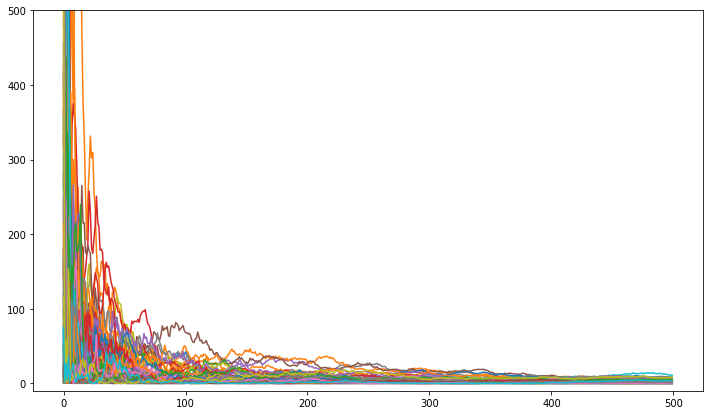

In [300]:
dfdivergence.plot(figsize = (12,7), legend=False) # This plot shows the divergence from the real mean for 100 runs of cumulative averaging. 
plt.ylim([-10,500])
plt.show()